In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal


In [2]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [3]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.14082e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.48388e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.08256e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.35911e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

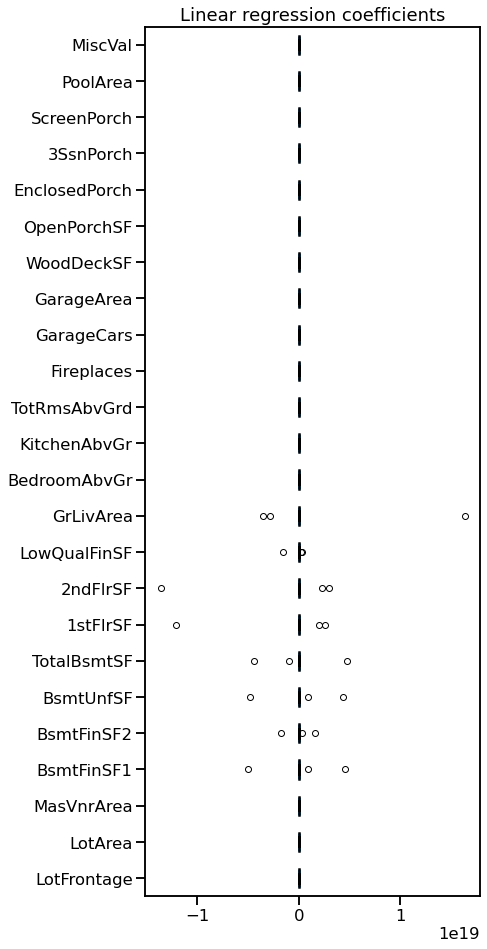

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

regressor = Ridge(alpha=0)

model = make_pipeline(StandardScaler(), regressor)


cv_results = cross_validate(estimator=model, X=data_numerical, y=target,
                            cv=10, return_estimator=True, n_jobs=2)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=numerical_features)

import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear regression coefficients")

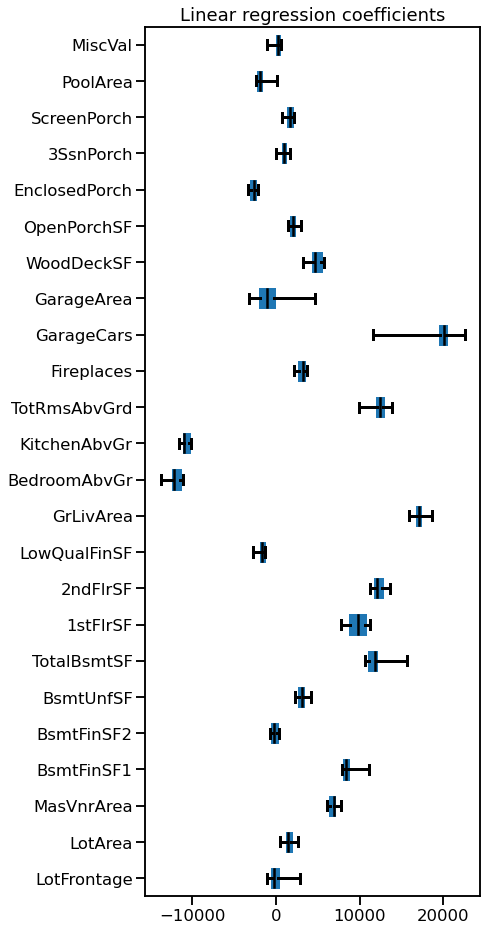

In [33]:
regressor = Ridge(alpha=1)

model = make_pipeline(StandardScaler(), regressor)


cv_results = cross_validate(estimator=model, X=data_numerical, y=target,
                            cv=10, return_estimator=True, n_jobs=2)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=numerical_features)

import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear regression coefficients")

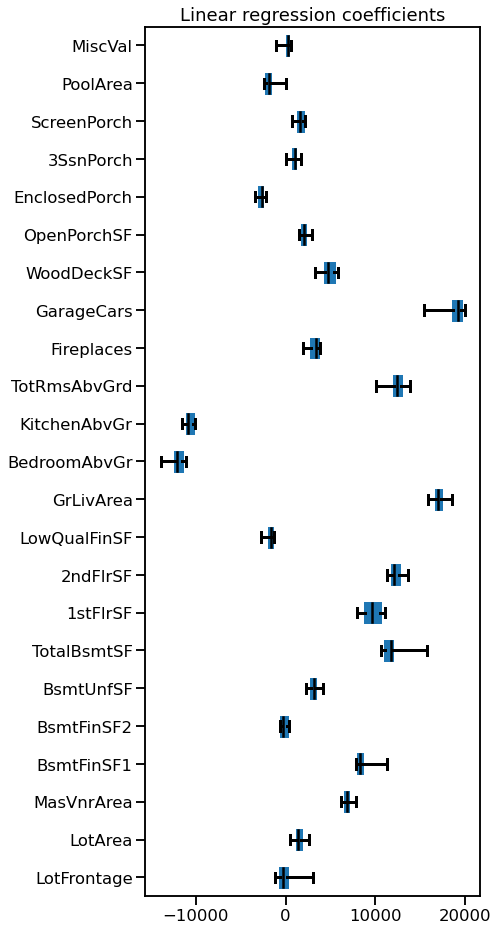

In [34]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

regressor = Ridge(alpha=1)

model = make_pipeline(StandardScaler(), regressor)


cv_results = cross_validate(estimator=model, X=data_numerical, y=target,
                            cv=10, return_estimator=True, n_jobs=2)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=numerical_features)

import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear regression coefficients")

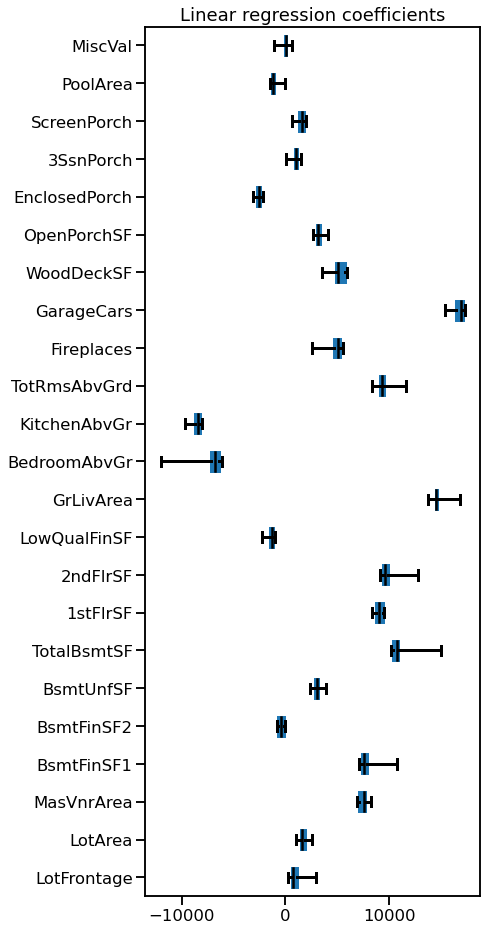

In [36]:
alphas=np.logspace(-3, 3, num=101)
from sklearn.linear_model import RidgeCV

regressor = RidgeCV(alphas=alphas)

model = make_pipeline(StandardScaler(), regressor)


cv_results = cross_validate(estimator=model, X=data_numerical, y=target,
                            cv=10, return_estimator=True, n_jobs=2)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=numerical_features)

import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear regression coefficients")

In [38]:
tuned_alphas = [pipeline[-1].alpha_ for pipeline in cv_results["estimator"]]
tuned_alphas

[331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 331.13112148259074,
 331.13112148259074,
 288.40315031266056,
 331.13112148259074,
 63.0957344480193,
 331.13112148259074]

In [39]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])
data

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


In [40]:
target

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

logistic_classifier = LogisticRegression()
dummy_classifier = DummyClassifier(strategy="most_frequent")

logistic_model = make_pipeline(StandardScaler(), logistic_classifier)
dummy_model = make_pipeline(StandardScaler(), dummy_classifier)

columns = ["age", "capital-gain", "capital-loss", "hours-per-week"]

In [55]:
log_results = cross_validate(estimator=logistic_model, X=data, y=target, cv=10,
                            return_estimator=True)
dummy_results = cross_validate(estimator=dummy_model, X=data, y=target, cv=10)


In [56]:
print(f"logistic classifier accuracy {log_results['test_score'].mean():.2f} +/- {log_results['test_score'].std():.2f}\n"
      f"dummy classifier accuracy {dummy_results['test_score'].mean():.2f} +/- {dummy_results['test_score'].std():.2f}")

logistic classifier accuracy 0.80 +/- 0.00
dummy classifier accuracy 0.76 +/- 0.00


In [62]:
coefs = [pipeline[-1].coef_ for pipeline in log_results["estimator"]]
coefs

[array([[0.52204276, 2.4667774 , 0.30602977, 0.53963505]]),
 array([[0.52606692, 2.40653282, 0.30817766, 0.54182433]]),
 array([[0.52425661, 2.45592287, 0.30812359, 0.54384342]]),
 array([[0.52037496, 2.45048201, 0.30916996, 0.53459728]]),
 array([[0.51925928, 2.51201042, 0.30424291, 0.54671495]]),
 array([[0.52173216, 2.4416315 , 0.30401707, 0.54128619]]),
 array([[0.52023528, 2.47372277, 0.30689298, 0.53637405]]),
 array([[0.52395804, 2.44532129, 0.30832579, 0.53825271]]),
 array([[0.51645436, 2.40508701, 0.30839363, 0.53512121]]),
 array([[0.51673694, 2.45048914, 0.30139428, 0.53553169]])]

In [58]:
data

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


In [63]:
coefs = [pipeline[-1].coef_[0] for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data.columns)
_, ax = plt.subplots(figsize=(15, 10))
coefs.abs().plot.box(**boxplot_property, ax=ax)

ValueError: Shape of passed values is (10, 1), indices imply (10, 4)

In [105]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [106]:
target

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

In [107]:
from sklearn import set_config
set_config(display='diagram')

In [108]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [109]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [110]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

regressor = LogisticRegression(max_iter=500)
model = make_pipeline(preprocessor, regressor)

In [112]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=10, return_estimator=True)

In [113]:
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.852 +/- 0.003


In [139]:
coefs = [pipeline[-1].coef_[0] for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data.columns)
_, ax = plt.subplots(figsize=(15, 10))
coefs.abs().plot.box(**boxplot_property, ax=ax)

TypeError: 'LogisticRegression' object is not subscriptable

In [141]:
coefs = [pipeline[-1].coef_[0] for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data.columns)

# Define the style of the box style
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 35))
ax.set(xlim=(-0.1, 2.5))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

ValueError: 12 columns passed, passed data had 106 columns